In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv("dataset_old.csv")
dataset.head()
dataset.stroke


0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [4]:
print(dataset.isnull().sum()) #finding column with NaN values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
heart_rate             0
stroke                 0
dtype: int64


In [5]:
dataset['bmi'].fillna(dataset['bmi'].mean(),inplace = True) #filling missing bmi with mean values

In [6]:
print(dataset.isnull().sum()) #finding column with NaN values

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
heart_rate           0
stroke               0
dtype: int64


In [7]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,heart_rate,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,87,1
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.893237,never smoked,90,1
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,88,1
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.400000,smokes,84,1
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,83,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,Yes,No,Yes,Private,Urban,83.75,28.893237,never smoked,63,0
5106,44873,Female,81.0,No,No,Yes,Self-employed,Urban,125.20,40.000000,never smoked,64,0
5107,19723,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.600000,never smoked,65,0
5108,37544,Male,51.0,No,No,Yes,Private,Rural,166.29,25.600000,formerly smoked,54,0


In [8]:
y = dataset.stroke
X = dataset.iloc[:,1:-1]
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,heart_rate
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,87
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.893237,never smoked,90
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,88
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.400000,smokes,84
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,83
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,Yes,No,Yes,Private,Urban,83.75,28.893237,never smoked,63
5106,Female,81.0,No,No,Yes,Self-employed,Urban,125.20,40.000000,never smoked,64
5107,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.600000,never smoked,65
5108,Male,51.0,No,No,Yes,Private,Rural,166.29,25.600000,formerly smoked,54


In [9]:
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [10]:
#OneHotEncoding
dm_X=pd.get_dummies(X)
X=dm_X
dm_X.head()

,age,avg_glucose_level,bmi,heart_rate,gender_Female,gender_Male,hypertension_No,hypertension_Yes,heart_disease_No,heart_disease_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.600000,87,0,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,202.21,28.893237,90,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,105.92,32.500000,88,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,171.23,34.400000,84,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,174.12,24.000000,83,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0


In [11]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.9,test_size = 0.1,random_state =10)

In [12]:
#finding columns with string data

object_cols = [col for col in dataset.columns if dataset[col].dtype == 'object']
print(object_cols)

['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [13]:
#finding columns with numeric data
num_cols = [col for col in X_train.columns if X_train[col].dtype == "float"]
print(num_cols)
print([col for col in X_train.columns if X_train[col].dtype == "int64"])


['age', 'avg_glucose_level', 'bmi']
['heart_rate']


In [14]:
#finding unique data in string valued columns

object_nunique = list(map(lambda col: dataset[col].nunique(),object_cols))
d = dict(zip(object_cols,object_nunique))
sorted(d.items(),key=lambda x:x[1])


[('gender', 2),
 ('hypertension', 2),
 ('heart_disease', 2),
 ('ever_married', 2),
 ('Residence_type', 2),
 ('smoking_status', 4),
 ('work_type', 5)]

In [15]:
#finding column with unique data in validation set that is not in training set

# train_label_cols = [col for col in object_cols if set(X_valid[col]).issubset(set(X_train[col]))]
# missing_label_cols = list(set(object_cols)-set(train_label_cols))
# print(missing_label_cols)


In [16]:
X_train

,age,avg_glucose_level,bmi,heart_rate,gender_Female,gender_Male,hypertension_No,hypertension_Yes,heart_disease_No,heart_disease_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4554,69.0,83.55,28.300000,65,1,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0
3900,63.0,81.54,24.200000,67,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
972,16.0,87.98,22.400000,46,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2897,63.0,82.72,28.893237,63,0,1,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1464,13.0,92.65,31.700000,72,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180,62.0,82.57,36.000000,65,1,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
3441,59.0,90.06,28.900000,61,1,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1344,47.0,86.37,39.200000,65,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
4623,25.0,166.38,23.100000,69,0,1,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [17]:
# alloting numerical values for categorical variables
# example: (male,female) = (1,0)
# (rural/urban)=(0,1) (yes/no)=(1,0) 
#(govt_job,never_worked,private,self-employed,children)=(0,1,2,3,4)
#(formerly smoked,never smoked,smokes,unknown)=(1,2,3,4)

# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value',unknown_value = -1)

# label_X_train = X_train.copy()
# label_X_valid = X_valid.copy()

# label_X_train[object_cols] = encoder.fit_transform(label_X_train[object_cols])
# label_X_valid[object_cols] = encoder.transform(label_X_valid[object_cols])

# label_X_train.tail()



In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()
model = RandomForestClassifier(n_estimators = 200, random_state = 10)
model.fit(label_X_train,y_train)
preds = model.predict(label_X_valid)


print(mean_absolute_error(y_valid,preds))

0.03522504892367906


In [19]:
from sklearn.metrics import precision_score

# print(preds)
precision = precision_score(y_valid,preds,average = 'binary')
print(precision)

1.0


In [20]:
from sklearn.metrics import recall_score

recall = recall_score(y_valid,preds,average = 'binary')
print(recall)

0.25


In [21]:
from sklearn.metrics import f1_score

fscore = f1_score(y_valid,preds,average = 'binary')

print(fscore)

0.4


In [22]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_valid,preds )
print(accuracy)



0.9647749510763209


In [23]:
#Code for oversampling

from imblearn.over_sampling import SMOTENC
smote = SMOTENC(random_state = 10,categorical_features = [0,2,3,4,5,6,9])

In [24]:
X_train_smote, y_train_smote = smote.fit_resample(dm_X,y)


In [25]:
from collections import Counter
print("Before SMOTE y_train :" , Counter(y))
print("After SMOTE y_train:" , Counter(y_train_smote))



Before SMOTE y_train : Counter({0: 4861, 1: 249})
After SMOTE y_train: Counter({1: 4861, 0: 4861})


In [26]:
y_train_smote.value_counts()



1    4861
0    4861
Name: stroke, dtype: int64

In [27]:
X_train_smote

,age,avg_glucose_level,bmi,heart_rate,gender_Female,gender_Male,hypertension_No,hypertension_Yes,heart_disease_No,heart_disease_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.690000,36.600000,87,0,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,202.210000,28.893237,90,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,105.920000,32.500000,88,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,171.230000,34.400000,84,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,174.120000,24.000000,83,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,78.0,130.035023,23.600000,77,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
9718,60.0,97.845265,28.893237,89,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9719,59.0,116.191144,31.100000,69,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9720,81.0,183.543898,37.100000,83,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [28]:
X_train_smote.tail()

,age,avg_glucose_level,bmi,heart_rate,gender_Female,gender_Male,hypertension_No,hypertension_Yes,heart_disease_No,heart_disease_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
9717,78.0,130.035023,23.600000,77,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
9718,60.0,97.845265,28.893237,89,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9719,59.0,116.191144,31.100000,69,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9720,81.0,183.543898,37.100000,83,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
9721,76.0,192.857888,34.100000,78,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [29]:
oversampled_data = X_train_smote.join(y_train_smote)
# oversampled_data.to_csv("/Users/macbookair/Documents/jupyter_model/dataset_oversampled.csv")


In [29]:
#repeating the model train and validation steps as above with oversampled data


y = oversampled_data.stroke
X = oversampled_data.iloc[:,0:-1]
X

,age,avg_glucose_level,bmi,heart_rate,gender_Female,gender_Male,hypertension_No,hypertension_Yes,heart_disease_No,heart_disease_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.690000,36.600000,87,0,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,202.210000,28.893237,90,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,105.920000,32.500000,88,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,171.230000,34.400000,84,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,174.120000,24.000000,83,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,78.0,130.035023,23.600000,77,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
9718,60.0,97.845265,28.893237,89,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
9719,59.0,116.191144,31.100000,69,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9720,81.0,183.543898,37.100000,83,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [30]:
# #Exporting encoded dataset
# ohe_col=pd.DataFrame(X)
# with open('ohe_col1.pkl','wb') as file:
#     pickle.dump(ohe_col,file)

In [31]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train_smote,y_train_smote,train_size = 0.9,test_size = 0.1,random_state =10)

In [32]:
object_cols = [col for col in X.columns if X[col].dtype == 'object']
object_nunique = list(map(lambda col: X[col].nunique(),object_cols))
d = dict(zip(object_cols,object_nunique))
sorted(d.items(),key=lambda x:x[1])

[]

In [33]:
train_label_cols = [col for col in object_cols if set(X_valid[col]).issubset(set(X_train[col]))]
missing_label_cols = list(set(object_cols)-set(train_label_cols))
print(missing_label_cols)

[]


In [34]:
# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder(handle_unknown = 'use_encoded_value',unknown_value = -1)

# label_X_train = X_train.copy()
# label_X_valid = X_valid.copy()

# label_X_train[object_cols] = encoder.fit_transform(label_X_train[object_cols])
# label_X_valid[object_cols] = encoder.transform(label_X_valid[object_cols])

# label_X_train.head()

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error


model = RandomForestClassifier(n_estimators = 15, random_state = 10)
clf=model.fit(X_train.head(25),y_train.head(25))
preds = model.predict(X_valid)


print(mean_absolute_error(y_valid,preds))

0.1593011305241521


In [36]:
from sklearn.metrics import precision_score

# print(preds)
precision = precision_score(y_valid,preds,average = 'binary')
print(precision)

0.4755661501787843


In [37]:
from sklearn.metrics import recall_score

recall = recall_score(y_valid,preds,average = 'binary')
print(recall)

0.8525641025641025


In [38]:
from sklearn.metrics import f1_score

fscore = f1_score(y_valid,preds,average = 'binary')

print(fscore)

0.6105585309869931


In [39]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_valid,preds )
print(accuracy)


0.47687564234326824


In [40]:
# #Storing model in fileformat to use in Django

# with open('model_pickled1.pkl','wb') as file:
#     pickle.dump(model,file)

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline


In [42]:
from sklearn import tree 


[Text(0.6818181818181818, 0.9166666666666666, 'work_type_Self-employed <= 0.5\ngini = 0.499\nsamples = 17\nvalue = [12, 13]\nclass = 1'),
 Text(0.5909090909090909, 0.75, 'smoking_status_never smoked <= 0.5\ngini = 0.455\nsamples = 15\nvalue = [7, 13]\nclass = 1'),
 Text(0.36363636363636365, 0.5833333333333334, 'smoking_status_formerly smoked <= 0.5\ngini = 0.245\nsamples = 11\nvalue = [2, 12]\nclass = 1'),
 Text(0.18181818181818182, 0.4166666666666667, 'Residence_type_Urban <= 0.5\ngini = 0.153\nsamples = 9\nvalue = [1, 11]\nclass = 1'),
 Text(0.09090909090909091, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 7]\nclass = 1'),
 Text(0.2727272727272727, 0.25, 'age <= 45.5\ngini = 0.32\nsamples = 4\nvalue = [1, 4]\nclass = 1'),
 Text(0.18181818181818182, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.36363636363636365, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 4]\nclass = 1'),
 Text(0.5454545454545454, 0.4166666666666667, 'heart_rate <= 

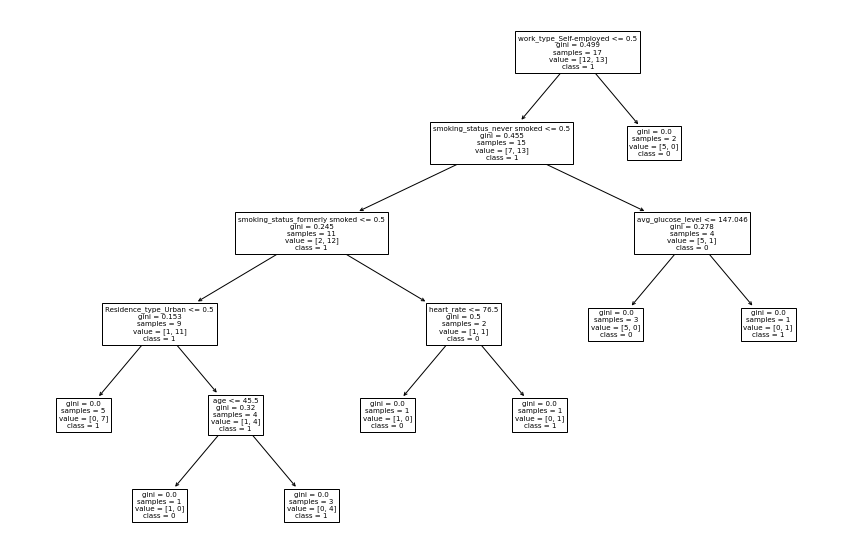

In [92]:
len(clf.estimators_)
X_f=X_train.head(15)
y_f=y_train.head(15)
plt.figure(figsize=(15,10))
tree.plot_tree(clf.estimators_[10],filled=False,feature_names=X_f.columns,class_names=['0','1'])



In [45]:
from sklearn.tree import export_text
print(export_text(clf.estimators_[3]))
#decision tree in text form --> class1, class 0

|--- feature_11 <= 0.50
|   |--- class: 0.0
|--- feature_11 >  0.50
|   |--- feature_14 <= 0.50
|   |   |--- class: 0.0
|   |--- feature_14 >  0.50
|   |   |--- class: 1.0



In [118]:
X_train.head(5).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 5326 to 1641
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5 non-null      float64
 1   avg_glucose_level               5 non-null      float64
 2   bmi                             5 non-null      float64
 3   heart_rate                      5 non-null      int64  
 4   gender_Female                   5 non-null      uint8  
 5   gender_Male                     5 non-null      uint8  
 6   hypertension_No                 5 non-null      uint8  
 7   hypertension_Yes                5 non-null      uint8  
 8   heart_disease_No                5 non-null      uint8  
 9   heart_disease_Yes               5 non-null      uint8  
 10  ever_married_No                 5 non-null      uint8  
 11  ever_married_Yes                5 non-null      uint8  
 12  work_type_Government Job        5 

In [132]:
dataset.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,heart_rate,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,87,1
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.893237,never smoked,90,1
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,88,1
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.400000,smokes,84,1
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,83,1
5,56669,Male,81.0,No,No,Yes,Private,Urban,186.21,29.000000,formerly smoked,83,1
6,53882,Male,74.0,Yes,Yes,Yes,Private,Rural,70.09,27.400000,never smoked,91,1
7,10434,Female,69.0,No,No,No,Private,Urban,94.39,22.800000,never smoked,78,1
8,27419,Female,59.0,No,No,Yes,Private,Rural,76.15,28.893237,Unknown,88,1
9,60491,Female,78.0,No,No,Yes,Private,Urban,58.57,24.200000,Unknown,84,1
